In [1]:
import exVAF as exVAF
va=exVAF.VAF()
import numpy as np
from scipy.optimize import minimize

ImportError: No module named uscsi

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

In [3]:
# calc cost function with inputted corrector kick angles
def cor2bpm(x,ls):
    global sola,solx, ncount
    ncount +=1
    il = len(x)
    xcin = x[0::2]
    ycin = x[1::2]
    for (i,pos) in enumerate(np.array(va.corls)[ls]):
        va.setelem(pos,'theta_x',float(xcin[i]))
        va.setelem(pos+1,'theta_y',float(ycin[i]))
    va.tcs()
    tmp = np.array(va.ldata)
    xbpms = tmp[va.bpmls,1]
    ybpms = tmp[va.bpmls,2]
    r2bpms = np.sqrt(xbpms*xbpms+ybpms*ybpms)
    # calculate cost function
    ans = np.amax(r2bpms) * np.average(r2bpms)*np.std(r2bpms)
    # store best input values
    if ans<sola :
        sola = ans
        solx = x
    return(ans)

# reset corrector parameters
def cor2reset():
    for (i,pos) in enumerate(va.corls[::2]):
        va.setelem(pos,'theta_x',0.0)
        va.setelem(pos+1,'theta_y',0.0)
    va.tcs()

In [4]:
# Set initial parameter for orbit correction
var = 90 # number of correctors both x and y
ls = range(0,var,2)
x0 = np.zeros(var) # initial corrector kick angles (=0.0)
bnds = np.array([(-3e-3, 3e-3) for _ in range(len(x0))],dtype=float)

In [28]:
# Run minimization
sola = 1e256 # worst cost value
ncount = 0   # check number of evaluations
res=minimize(cor2bpm,x0,args=(ls,),method='L-BFGS-B',\
             bounds=bnds,\
             options={'maxiter':100, 'disp':False, 'eps':1.0e-7})

In [4]:
va.setelem(9,'theta_x',0.1)
va.getelem(9)


{'type': 'orbtrim', 'name': 'ls1_ca01_dch_d1131_2', 'theta_x': 0.1}


In [2]:
tmp=va.M.conf()['elements'][9]
tmp['theta_x'] = 1.0
va.M.reconfigure(9,tmp)
va.M.conf()['elements'][9]

{'name': 'ls1_ca01_dch_d1131_2', 'theta_x': 1.0, 'type': 'orbtrim'}

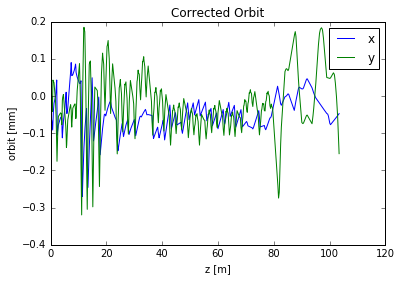

In [29]:
cor2bpm(solx,ls)
tmp=np.array(va.ldata)
plt.plot(tmp[:,0],tmp[:,1], label='x')
plt.plot(tmp[:,0],tmp[:,2], label='y')
plt.legend(loc='best')
plt.ylabel('orbit [mm]')
plt.xlabel('z [m]')
plt.title('Corrected Orbit')
plt.show()

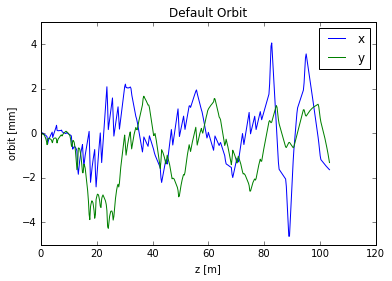

In [14]:
cor2reset()
tmp=np.array(va.ldata)
plt.plot(tmp[:,0],tmp[:,1], label='x')
plt.plot(tmp[:,0],tmp[:,2], label='y')
plt.legend(loc='best')
plt.ylabel('orbit [mm]')
plt.xlabel('z [m]')
plt.title('Default Orbit')
plt.show()

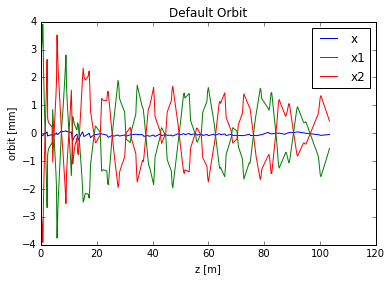

In [30]:
#cor2reset()
cor2bpm(solx,ls)
tmp=np.array(va.ldata)
plt.plot(tmp[:,0],tmp[:,1], label='x')
#plt.plot(tmp[:,0],tmp[:,2], label='y')
st,r1,r2 = va.tcs_seg(0,822,allcs=1)
tmp=np.array(r2)
plt.plot(tmp[0][:,0],tmp[0][:,1], label='x1')
#plt.plot(tmp[0][:,0],tmp[0][:,2], label='y1')
plt.plot(tmp[1][:,0],tmp[1][:,1], label='x2')
#plt.plot(tmp[1][:,0],tmp[1][:,2], label='y2')
plt.legend(loc='best')
plt.ylabel('orbit [mm]')
plt.xlabel('z [m]')
plt.title('Default Orbit')
plt.show()

In [26]:
va.BC0[0][0]=3.0
va.BC0[0][1]=-3.0

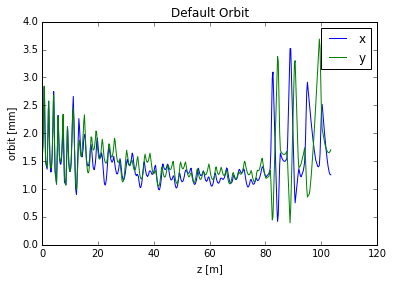

In [5]:
cor2reset()
tmp=np.array(va.ldata)
plt.plot(tmp[:,0],tmp[:,4], label='x')
plt.plot(tmp[:,0],tmp[:,5], label='y')
plt.legend(loc='best')
plt.ylabel('orbit [mm]')
plt.xlabel('z [m]')
plt.title('Default Orbit')
plt.show()

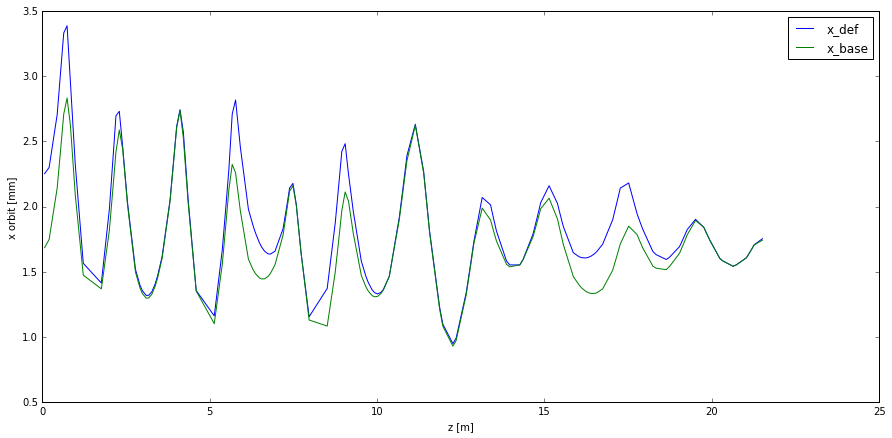

In [14]:
lng = 200
xc = 4
plt.figure(figsize=(15,7))
va.BC0[0]=3.0
#cor2bpm(solx,ls)
#tmp=np.array(va.ldata)
#plt.plot(tmp[1:lng,0],tmp[1:lng,xc], label='x')

cor2reset()
tmp=np.array(va.ldata)
plt.plot(tmp[1:lng,0],tmp[1:lng,xc], label='x_def')

va.BC0[0]=0.0
cor2reset()
tmp=np.array(va.ldata)
plt.plot(tmp[1:lng,0],tmp[1:lng,xc], label='x_base')
plt.legend(loc='best')
plt.ylabel('x orbit [mm]')
plt.xlabel('z [m]')
plt.show()
